In [1]:
import math as m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat
from uncertainties import unumpy

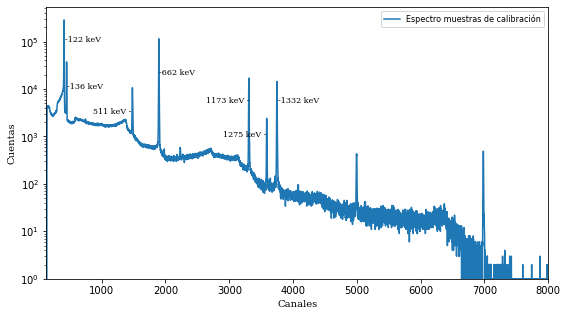

In [2]:
europio=pd.read_table("./data/calibracionEu-Ge8K.xy",sep="\s+",names=["canales","cuentas"])
muestras=pd.read_table("./data/calibracionNaCoCoCs-Ge8K.xy",sep="\s+",names=["canales","cuentas"])
fig,ax=plt.subplots(figsize=(9,5))
ax.plot(muestras.canales,muestras.cuentas,label="Espectro muestras de calibración")
ax.set_xlim(128,8000)

ax.set_yscale("log")
ax.set_xlabel("Canales",family="serif")
ax.set_ylabel("Cuentas",family="serif")
ax.text(420, 1e5, '-122 keV',family="serif",fontsize=8)
ax.text(450, 1e4, '-136 keV',family="serif",fontsize=8)
ax.text(870, 3e3, '511 keV -',family="serif",fontsize=8)
ax.text(1900, 2e4, '-662 keV',family="serif",fontsize=8)
ax.text(2630, 5e3, '1173 keV -',family="serif",fontsize=8)
ax.text(2900, 1e3, '1275 keV -',family="serif",fontsize=8)
ax.text(3760, 5e3, '-1332 keV ',family="serif",fontsize=8)
ax.set(ylim=1)
ax.legend(fontsize=8)
plt.show()

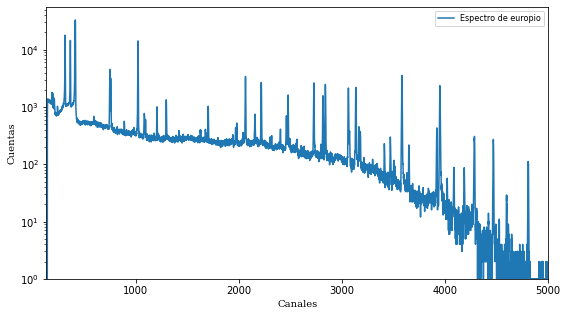

In [3]:
fig,ax=plt.subplots(figsize=(9,5))
ax.plot(europio.canales,europio.cuentas,label="Espectro de europio")
ax.set_xlim(128,5000)

ax.set_yscale("log")
ax.set_xlabel("Canales",family="serif")
ax.set_ylabel("Cuentas",family="serif")

ax.set(ylim=1)
ax.legend(fontsize=8)
plt.show()

In [4]:
from lmfit.models import GaussianModel,LinearModel
def ajuste(data,x1,x2):
    gaussiana=GaussianModel()
    fondo=LinearModel()
    ajuste=gaussiana+fondo
    x=data.canales[x1:x2].values
    y=data.cuentas[x1:x2].values
    parametros=gaussiana.guess(data=y,x=x)
    parametros+=fondo.guess(data=y,x=x)
    fit=ajuste.fit(y,parametros,x=x)
    return fit


In [5]:
limites=[[390,430],[440,460],[1465,1500],[1875,1920],[3560,3620],[3700,3800]]
muestra=["$^{57}$Co","$^{57}$Co","$^{22}$Na","$^{137}$Cs", "$^{22}$Na", "$^{60}$Co"]
energía=[122.1,136.5,511,661.7,1274.5,1332.5]
fwhm=[]
sigma=[]
mu=[]
amplitud=[]

for x1,x2 in limites:
    fit=ajuste(muestras,x1,x2)
    params=fit.uvars
    mu.append(params["center"])
    sigma.append(params["sigma"])
    fwhm.append(params["fwhm"])
    amplitud.append(params["amplitude"])

Tabla_muestra=pd.DataFrame()
Tabla_muestra["E"]=energía
Tabla_muestra["mu"]=mu
Tabla_muestra["sigma"]=sigma
Tabla_muestra["I(cuentas)"]=np.sqrt(2*np.pi)*Tabla_muestra.sigma*np.array(amplitud)

Tabla_muestra

,E,mu,sigma,I(cuentas)
0,122.1,410.612+/-0.026,1.659+/-0.027,(4.77+/-0.14)e+06
1,136.5,450.258+/-0.030,1.661+/-0.033,(5.89+/-0.22)e+05
2,511.0,1481.317+/-0.023,3.511+/-0.026,(7.25+/-0.10)e+05
3,661.7,1896.496+/-0.018,2.203+/-0.019,(3.48+/-0.05)e+06
4,1274.5,3586.657+/-0.026,2.575+/-0.028,(9.75+/-0.18)e+04
5,1332.5,3746.464+/-0.015,2.635+/-0.015,(6.28+/-0.06)e+05


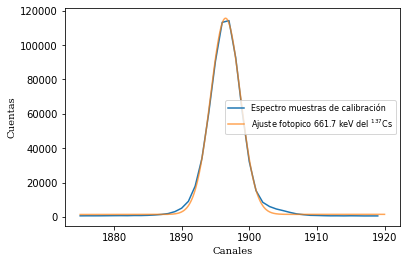

In [6]:
fig,ax=plt.subplots()
n=3
x1,x2=limites[n]
fit=ajuste(muestras,x1,x2)
ax.plot(muestras.canales[x1:x2],muestras.cuentas[x1:x2],label="Espectro muestras de calibración")
ax.plot(np.linspace(x1,x2,500),fit.eval(x=np.linspace(x1,x2,500)),alpha=0.7,label=f"Ajuste fotopico {energía[n]} keV del {muestra[n]}")
ax.set_xlabel("Canales",family="serif")
ax.set_ylabel("Cuentas",family="serif")
ax.legend(fontsize=8)
plt.show()

In [7]:
energía=[86.5,105.3,344.3,723.3,964.1,1274.5,1596.5,]
limites=[[302,320],[355,370],[1000,1040],[2050,2080],[2710,2740],[3570,3590],[4440,4500]]
fwhm=[]
sigma=[]
mu=[]
amplitud=[]

for x1,x2 in limites:
    fit=ajuste(europio,x1,x2)
    params=fit.uvars
    mu.append(params["center"])
    sigma.append(params["sigma"])
    fwhm.append(params["fwhm"])
    amplitud.append(params["amplitude"])

Tabla_europio=pd.DataFrame()
Tabla_europio["E"]=energía
Tabla_europio["mu"]=mu
Tabla_europio["sigma"]=sigma
Tabla_europio["I(cuentas)"]=np.sqrt(2*np.pi)*Tabla_europio.sigma*np.array(amplitud)

Tabla_europio


,E,mu,sigma,I(cuentas)
0,86.5,312.164+/-0.018,1.352+/-0.020,(1.91+/-0.05)e+05
1,105.3,363.688+/-0.018,1.399+/-0.021,(1.67+/-0.05)e+05
2,344.3,1020.101+/-0.009,1.749+/-0.009,(2.656+/-0.024)e+05
3,723.3,2062.906+/-0.013,2.056+/-0.014,(8.26+/-0.10)e+04
4,964.1,2725.828+/-0.018,2.248+/-0.019,(7.75+/-0.12)e+04
5,1274.5,3580.550+/-0.017,2.432+/-0.020,(1.296+/-0.021)e+05
6,1596.5,4467.270+/-0.024,2.711+/-0.025,(1.194+/-0.020)e+04


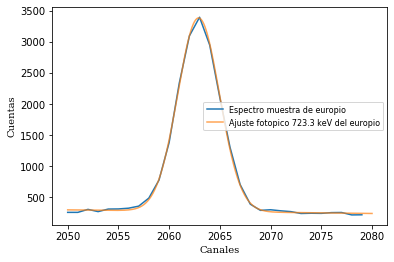

In [8]:
fig,ax=plt.subplots()
n=3
x1,x2=limites[n]
fit=ajuste(europio,x1,x2)
ax.plot(europio.canales[x1:x2],europio.cuentas[x1:x2],label="Espectro muestra de europio")
ax.plot(np.linspace(x1,x2,500),fit.eval(x=np.linspace(x1,x2,500)),alpha=0.7,label=f"Ajuste fotopico {energía[n]} keV del europio")
ax.set_xlabel("Canales",family="serif")
ax.set_ylabel("Cuentas",family="serif")
ax.legend(fontsize=8)
plt.show()

{'slope': 0.36318954123913233+/-0.00015900267775847515, 'intercept': -26.77022208237267+/-0.3914560021619901}


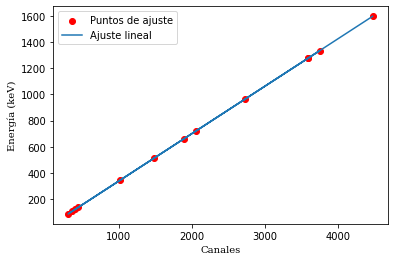

In [9]:
y=Tabla_muestra.E.values
y=np.append(y,Tabla_europio.E.values)
x=unumpy.nominal_values(Tabla_muestra.mu.values)
x=np.append(x,unumpy.nominal_values(Tabla_europio.mu.values))


#regresión lineal
ec=LinearModel()
params=ec.guess(y,x=x)
a=ec.fit(y,params,x=x)
print(a.uvars)



plt.scatter(x,y,color="r",label="Puntos de ajuste")
plt.plot(x,a.eval(x=x),label="Ajuste lineal")
plt.legend()
plt.xlabel("Canales",family="serif")
plt.ylabel("Energía (keV)",family="serif")
plt.show()

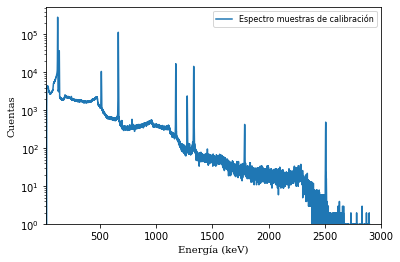

In [10]:
x=a.eval(x=muestras.canales)
y=muestras.cuentas
fig,ax=plt.subplots()
ax.plot(x,y,label="Espectro muestras de calibración")
ax.set_yscale("log")
ax.set_xlabel("Energía (keV)",family="serif")
ax.set_ylabel("Cuentas",family="serif")
ax.set_xlim(19,3000)
ax.set(ylim=1)
ax.legend(fontsize=8)

plt.show()

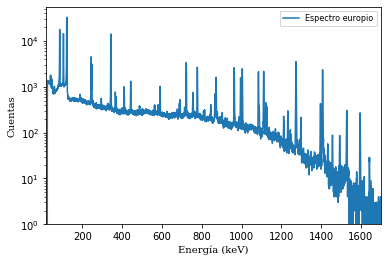

In [11]:
x=a.eval(x=europio.canales)
y=europio.cuentas
fig,ax=plt.subplots()
ax.plot(x,y,label="Espectro europio")
ax.set_yscale("log")
ax.set_xlabel("Energía (keV)",family="serif")
ax.set_ylabel("Cuentas",family="serif")
ax.set_xlim(18,1700)
ax.set(ylim=1)
ax.legend(fontsize=8)
plt.show()

In [12]:
from scipy.optimize import curve_fit

E = [86.5, 105.3, 122.1, 136.5, 344.5, 661.7, 723.3, 964.1, 1274.5, 1332.5, 1596.5]
sigma = [1.352, 1.399, 1.659, 1.661, 1.749, 2.203, 2.056, 2.248, 2.432, 2.635, 2.711]
FWHM = (2*np.sqrt(2*m.log(2)))*np.array(sigma)
FWHM_e = np.array(FWHM)*0.3631895412391691
print(FWHM_e) 

[1.15629261 1.19648917 1.41885313 1.42056363 1.49582527 1.88410696
 1.7583858  1.92259303 2.0799583  2.25357324 2.31857194]


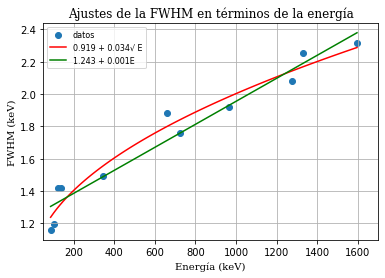

Parámetros ajustados:
f0 = 0.9189784834709183, delta_f0 = 0.06176084217935058
f1 = 0.034269627532427606, delta_f1 = 0.0023896800224569104
l0 = 1.2432031760178472, delta_l0 = 0.04915481989908382
l1 = 0.0007118037640895466, delta_l1 = 5.7603113809699855e-05


In [13]:
def FWHM(E, f0, f1):
    return f0 + f1*np.sqrt(E)

params, covariance = curve_fit(FWHM, E, FWHM_e)
f0, f1 = params
E_fit = np.linspace(min(E), max(E), 100)
FWHM_e_fit = FWHM(E_fit, f0, f1)
errors = np.sqrt(np.diag(covariance))

def FWHM1(E, l0, l1):
    return l0 + l1*E

params1, covariance1 = curve_fit(FWHM1, E, FWHM_e)
l0, l1 = params1
errors1 = np.sqrt(np.diag(covariance1))

E_fit = np.linspace(min(E), max(E), 100)
FWHM1_e_fit = FWHM1(E_fit, l0, l1)

plt.scatter(E, FWHM_e, label = "datos")
plt.plot(E_fit, FWHM_e_fit, color = "red", label = f"{f0:.3f} + {f1:.3f}\u221A E")
plt.plot(E_fit, FWHM1_e_fit, color = "green", label = f"{l0:.3f} + {l1:.3f}E" )
plt.xlabel("Energía (keV)", family = "serif")
plt.ylabel("FWHM (keV)", family = "serif")
plt.title("Ajustes de la FWHM en términos de la energía", family = "serif")
plt.legend(fontsize = 8)
plt.xlim(50, 1700)
plt.grid()
plt.show()
print(f"Parámetros ajustados:") 
print(f"f0 = {f0}, delta_f0 = {errors[0]}")
print(f"f1 = {f1}, delta_f1 = {errors[1]}")
print(f"l0 = {l0}, delta_l0 = {errors1[0]}")
print(f"l1 = {l1}, delta_l1 = {errors1[1]}")

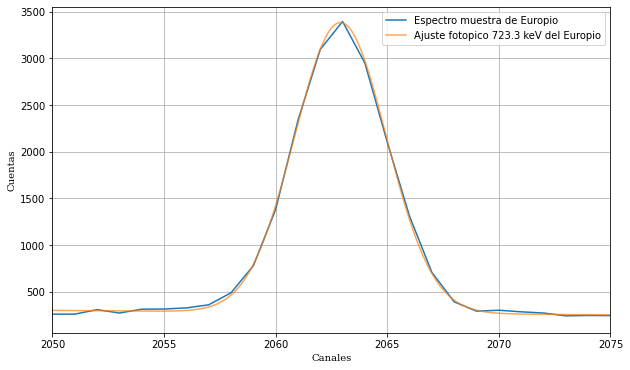

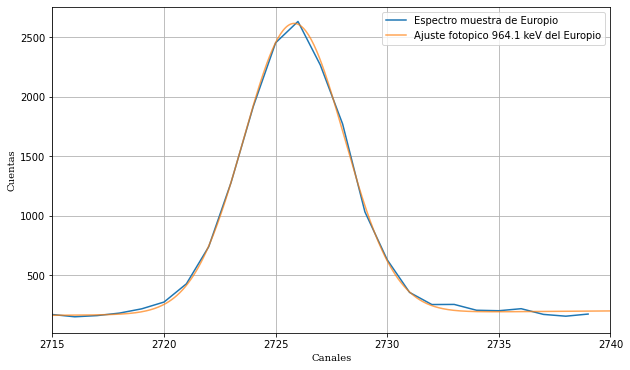

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
n = 3
x1, x2 = limites[n]
fit = ajuste(europio, x1, x2)
ax.plot(europio.canales[x1:x2], europio.cuentas[x1:x2], label="Espectro muestra de Europio")
ax.plot(np.linspace(x1, x2, 500), fit.eval(x=np.linspace(x1, x2, 500)), alpha=0.7, label=f"Ajuste fotopico {energía[n]} keV del Europio")
ax.set_xlabel("Canales", family="serif")
ax.set_ylabel("Cuentas", family="serif")
ax.legend(fontsize=10, loc='upper right', bbox_to_anchor=(1, 1))
plt.xlim(2050, 2075)
plt.grid()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
n = 4
x1, x2 = limites[n]
fit = ajuste(europio, x1, x2)
ax.plot(europio.canales[x1:x2], europio.cuentas[x1:x2], label="Espectro muestra de Europio")
ax.plot(np.linspace(x1, x2, 500), fit.eval(x=np.linspace(x1, x2, 500)), alpha=0.7, label=f"Ajuste fotopico {energía[n]} keV del Europio")
ax.set_xlabel("Canales", family="serif")
ax.set_ylabel("Cuentas", family="serif")
ax.legend(fontsize=10, loc='upper right', bbox_to_anchor=(1, 1))
plt.xlim(2715, 2740)
plt.grid()
plt.show()

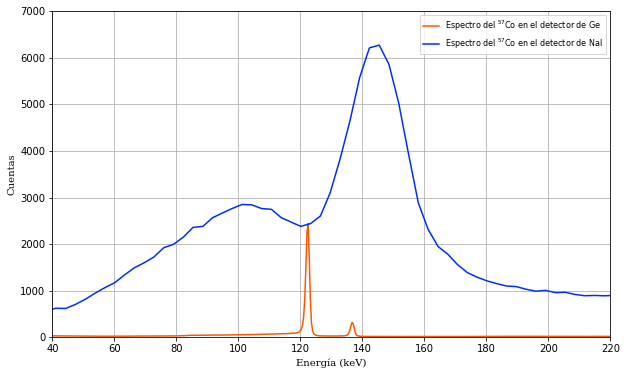

In [15]:
a0 = -41
a1 = 3.16


datos = "./data/NaI_57Co_300s.dat"
df1 = pd.read_table(datos, sep="\s+")
#x_energia
x2 = df1["canal"]
x_energia = a0 + a1 * x2
x1 = a.eval(x=muestras.canales)
y1 = muestras.cuentas
y2 = df1["cuentas"]

factor_ajuste = y2.loc[(x_energia >= 120) & (x_energia <= 124)].max() / y1.loc[(x1 >= 120) & (x1 <= 124)].max()
y1_ajustado = y1 * factor_ajuste

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(x1, y1_ajustado, color="#FF5500", label="Espectro del $^{57}$Co en el detector de Ge")
plt.plot(x_energia, y2, color="#002AFF", label="Espectro del $^{57}$Co en el detector de NaI")
ax.set_xlabel("Energía (keV)", family="serif")
ax.set_ylabel("Cuentas", family="serif")
ax.set_xlim(40, 220)
ax.set_ylim(0, 7000)
ax.legend(fontsize=8)
plt.grid()
plt.show()


In [16]:
E = [86.5, 105.3, 344.3, 723.3, 964.1, 1274.5, 1596.5]
I = [1.91e5, 1.75e5, 2.656e5, 8.26e4, 7.75e4, 1.296e5, 1.194e4]
I_errors = [0.05e5, 0.05e5, 0.024e4, 0.1e4, 0.12e4, 0.021e5, 0.020e4]
A_gamma = [0.07, 0.05, 1.1, 0.65, 0.61, 1.13, 0.06]
efficiency = np.array(I) / np.array(A_gamma)
efficiency_errors = np.array(I_errors) / np.array(A_gamma)
normal_efficiency = np.array(efficiency)/ efficiency[1]
rounded_efficiency = np.round(efficiency, decimals=2)
rounded_errors = np.round(efficiency_errors, decimals=2)
normal_errors= np.array(rounded_errors)/efficiency[1]

print(rounded_errors)
print(rounded_efficiency)
print(normal_efficiency)

[ 71428.57 100000.      218.18   1538.46   1967.21   1858.41   3333.33]
[2728571.43 3500000.    241454.55  127076.92  127049.18  114690.27
  199000.  ]
[0.77959184 1.         0.06898701 0.03630769 0.03629977 0.03276865
 0.05685714]


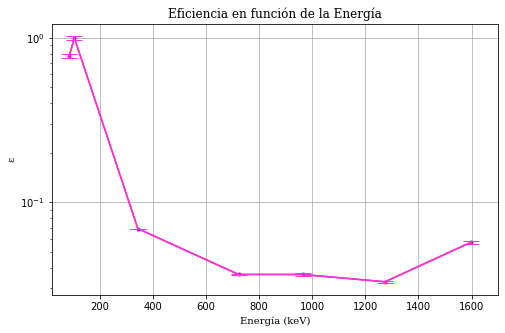

In [17]:
plt.figure(figsize=(8, 5))
plt.plot(E, normal_efficiency, marker=".", linestyle="-", color="#CC00AA")
plt.errorbar(E, normal_efficiency, yerr=normal_errors, capsize=8, color="#FF33DD")
plt.title("Eficiencia en función de la Energía", family = "serif")
plt.xlabel("Energía (keV)", family = "serif")
plt.ylabel("ε", family = "serif")
plt.yscale("log")
plt.xlim(20, 1700)
plt.grid(True)
plt.show()

Comparacion Ge-NaI Co60

[-41.01267312   3.1565241 ]
[7.95462746 0.02910891]


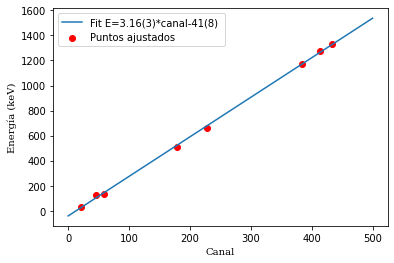

In [18]:
#Calibracion Lab2 NaI
energias=np.array([32.8,122.1,136.5,511,661.7,1173.2,1274.5,1332.5])
canales=np.array([21.08,45.91,58.74,179.49,228.08,384.68,414.40,432.98])

def E_NaI(canal,a0,a1):
    return a1*canal+a0

fit1=curve_fit(E_NaI,canales,energias)
args=fit1[0]
errorargs=np.sqrt(np.diag(fit1[1]))

def canal(E):
    return (E-args[0])/args[1]

x=np.linspace(0,500)
y=E_NaI(x,*args)
plt.plot(x,y,label=f"Fit E={args[1]:.2f}({errorargs[1]*100:.0f})*canal{args[0]:.0f}({errorargs[0]:.0f}) ")
plt.scatter(canales,energias,color="r",label="Puntos ajustados")
plt.xlabel("Canal",family="serif")
plt.ylabel("Energía (keV)",family="serif")
plt.legend()
print(args)
print(errorargs)

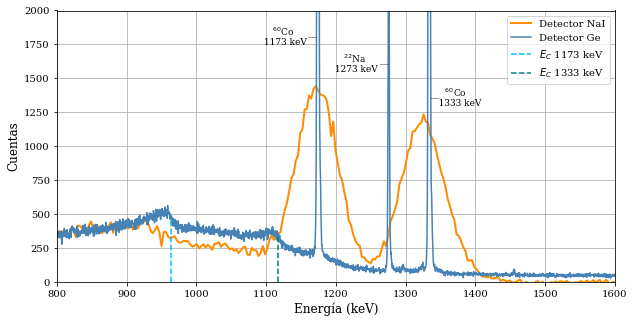

In [19]:
#PLOT Co60 NaI y Ge

Co60_NaI = pd.read_table("../Practica2/data/NaI_60Co_600s.dat", sep="\s+")
NaI_fondo= pd.read_table("../Practica2/data/NaI_Fondo_600s.dat", sep="\s+")

#Restar fondo
Co60_NaI.canal=Co60_NaI.canal
Co60_NaI.cuentas= Co60_NaI.cuentas-NaI_fondo.cuentas

# Set the font family to serif
plt.rcParams['font.family'] = 'serif'

#Plot NaI Co60
fig, ax = plt.subplots(figsize=(10, 5))
Energia_Co60=E_NaI(Co60_NaI.canal.values,*args) #canal a energia
ax.plot(Energia_Co60,Co60_NaI.cuentas,lw=2,label="Detector NaI", c="darkorange")
#Plot NaCoCoCs
x=a.eval(x=muestras.canales) #a, ajuste. Evaluar usando ajuste cada punto de la muestra calibracion
y=muestras.cuentas
ax.plot(x,y,label="Detector Ge", c='steelblue')

#compton lines Co60 
ax.vlines(963.2,0,470,color="deepskyblue",linestyles="dashed",label=r"$E_C$ 1173 keV ")
ax.vlines(1117.6,0,350,color="teal",linestyles="dashed",label=r"$E_C$ 1333 keV")

ax.text(1093, 1750, '    $^{60}$Co     __\n 1173 keV',family="serif",fontsize=9,linespacing=0.7)
ax.text(1195, 1550, '    $^{22}$Na     __\n 1273 keV',family="serif",fontsize=9,linespacing=0.7)
ax.text(1335, 1300, '__  $^{60}$Co       \n   1333 keV',family="serif",fontsize=9,linespacing=0.7)
ax.set_xlabel("Energía (keV)", family="serif", fontsize=12)
ax.set_ylabel("Cuentas", family="serif", fontsize=12)
ax.set_xlim(800, 1600)
ax.set_ylim(0, 2000)
ax.legend() 

plt.grid()
plt.show()

